In [10]:
import create_matrix
import pandas as pd 
from nltk import sent_tokenize, word_tokenize, PorterStemmer
import matplotlib.pyplot as plt
import re
import string
from functools import reduce
import math
from math import log
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster
from sklearn.cluster import KMeans
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords   
from nltk.cluster import KMeansClusterer
import numpy as np 
from nltk.cluster.util import cosine_distance
import nltk
import numpy as np
from operator import itemgetter
import featureExtraction, preprocessing, settings, readfile
import os
import glob
import errno
import sys

import json
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


       

79
---------------------------------------------------------------------------
Number of cluster2: 1 Value of SSE/Distortion: 8.152441307052008
Number of cluster2: 2 Value of SSE/Distortion: 7.25948444443087
Number of cluster2: 3 Value of SSE/Distortion: 6.95947789951105
Number of cluster2: 4 Value of SSE/Distortion: 6.504006105016991
Number of cluster2: 5 Value of SSE/Distortion: 6.350592653608336
Number of cluster2: 6 Value of SSE/Distortion: 6.074735029043649
Number of cluster2: 7 Value of SSE/Distortion: 5.8756052967366506
Number of cluster2: 8 Value of SSE/Distortion: 5.8050243710078
Number of cluster2: 9 Value of SSE/Distortion: 5.691069192016576
Number of cluster2: 10 Value of SSE/Distortion: 5.329414226501436
Number of cluster2: 11 Value of SSE/Distortion: 5.328046641964362
Number of cluster2: 12 Value of SSE/Distortion: 5.131233494242506
Number of cluster2: 13 Value of SSE/Distortion: 5.137281107129646
Number of cluster2: 14 Value of SSE/Distortion: 4.975095422870454
[4 2 4 4 

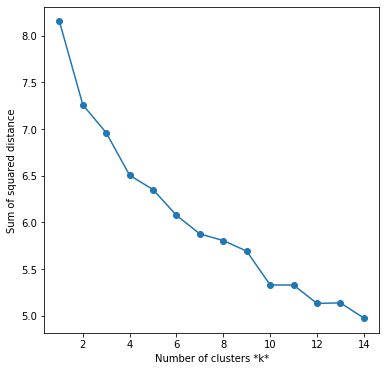

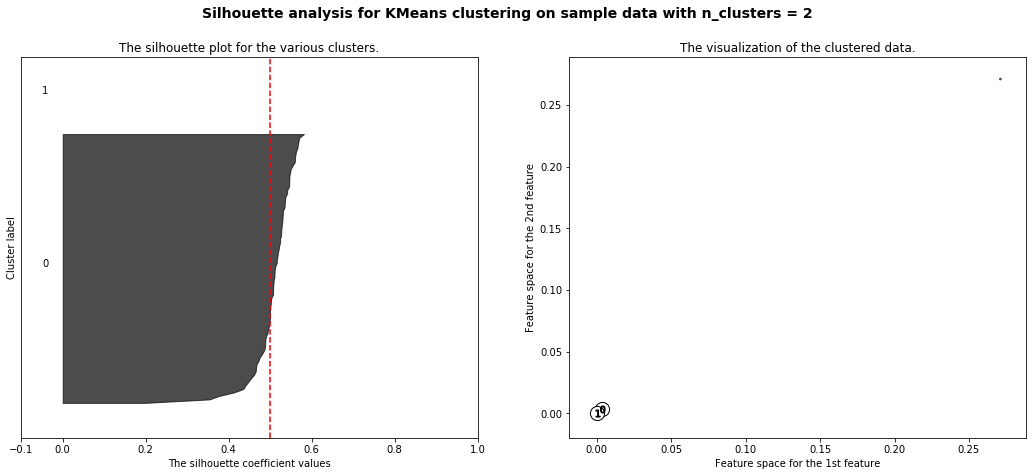

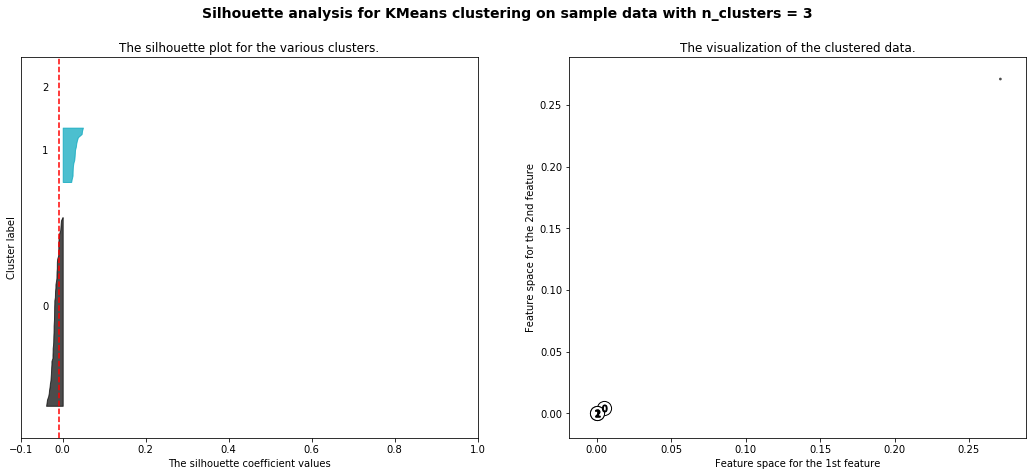

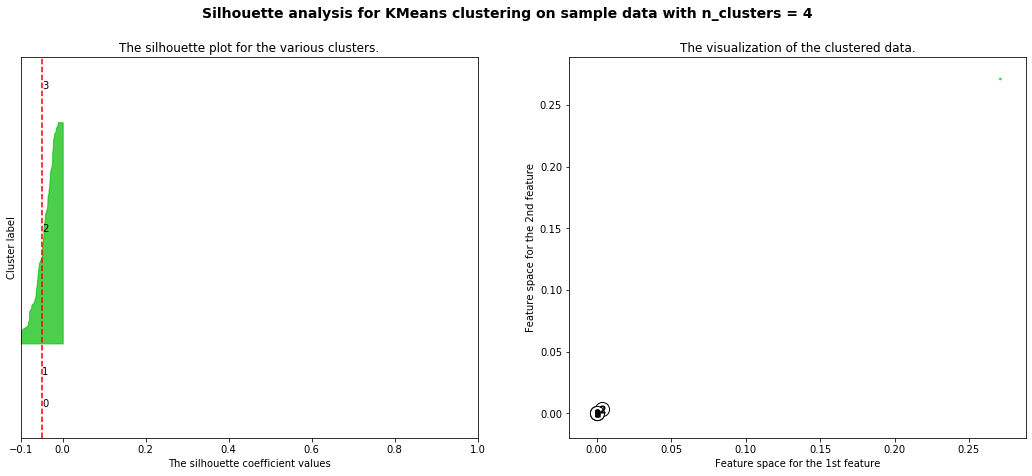

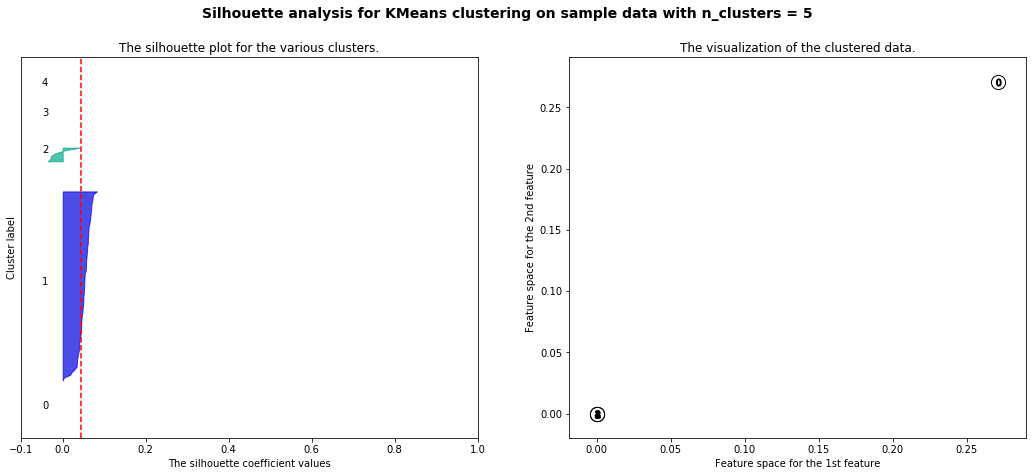

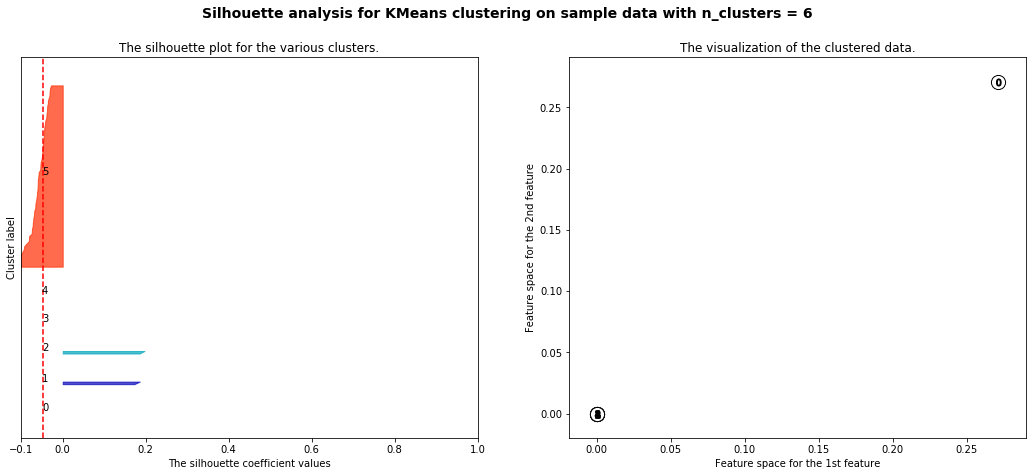

Max score is:  0.4992349445134707
best_cluster_value is  2
best_cluster_label is  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
60


In [11]:
with open('/home/pham.thi.hoa/PycharmProjects/base.vn/textrank/envir.json') as jsonf:
    data = json.load(jsonf)
    
    file_plaintext = data["file_plaintext"]
    
    file_system_textrank = data["file_system_textrank"]
    file_system_KMeans = data["file_system_KMeans"] 


class KmeansCluster(object):
    def Import_KMeans(self,path):
        # _, doc = readfile.FileReader(path).read_file()
        doc = readfile.FileReader(path).read_file()
        # print(title)
        sentences = preprocessing.NLP(doc).sentence_segmentation()
        total_documents = len(sentences)
        print(total_documents, end="\n")
        freq_matrix = create_matrix.Create_frequency_matrix(sentences)
        tf_matrix = create_matrix.Create_tf_matrix(freq_matrix)
        count_doc_per_words = create_matrix.Create_documents_per_words(freq_matrix)
        # Calculate IDF and generate a matrix
        idf_matrix = create_matrix.Create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
        # print(idf_matrix)

        # 6 Calculate TF-IDF and generate a matrix
        tf_idf_matrix = create_matrix.Create_tf_idf_matrix(tf_matrix, idf_matrix)
        # print(tf_idf_matrix)

        
        sentence_scores = create_matrix.Score_sentences(tf_idf_matrix)
        # print(sentence_scores)
        #Creating a dataframe from tfidfmatrix for data processing 
        df = pd.DataFrame(tf_idf_matrix)
        df = df.T
        df.replace(np.nan,0,inplace=True)
        x = df.values
       
        print("---------------------------------------------------------------------------")
        x.shape 
    
        sse = []
        list_k = list(range(1, 15))

        for k in list_k:
            km = KMeans(n_clusters=k)
            km.fit(x)
            sse.append(km.inertia_)
            print("Number of cluster2: {}".format(k), end=" ")
            print("Value of SSE/Distortion: {}".format(km.inertia_))
        plt.figure(figsize=(6, 6))
        plt.plot(list_k, sse, '-o')
        plt.xlabel(r'Number of clusters *k*')
        plt.ylabel('Sum of squared distance');

        # # Apply clustering on the data using sklearn KMeans
        kmeans = cluster.KMeans(n_clusters=7, init='k-means++',
                            max_iter=100, n_init=1, verbose=0, random_state=3425)
        kmeans.fit(x)

        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        labels
        print(labels)
        centroids.shape 
        X=x
        range_n_clusters = [2, 3, 4, 5, 6]
        max_score = 0
        best_cluster_value = 0
        best_cluster_label = 0

        for n_clusters in range_n_clusters:

            # Create a subplot with 1 row and 2 columns
            fig, (ax1, ax2) = plt.subplots(1, 2)
            fig.set_size_inches(18, 7)

            # The 1st subplot is the silhouette plot
            # The silhouette coefficient can range from -1, 1 but in this example all
            # lie within [-0.1, 1]
            ax1.set_xlim([-0.1, 1])
            # The (n_clusters+1)*10 is for inserting blank space between silhouette
            # plots of individual clusters, to demarcate them clearly.
            ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

            # Initialize the clusterer with n_clusters value and a random generator
            # seed of 10 for reproducibility.
            clusterer = KMeans(n_clusters=n_clusters, random_state=10)
            cluster_labels = clusterer.fit_predict(X)

            print("Cluster lables for clusters = {} are {}".format(n_clusters, cluster_labels))

            # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
            silhouette_avg = silhouette_score(X, cluster_labels)
            print("For n_clusters =", n_clusters,
                  "The average silhouette_score is :", silhouette_avg)


            #Check best score and labels
            if max_score < silhouette_avg:
                max_score = silhouette_avg
                best_cluster_value = n_clusters
                best_cluster_label = cluster_labels


            # Compute the silhouette scores for each sample
            sample_silhouette_values = silhouette_samples(X, cluster_labels)

            y_lower = 10
            for i in range(n_clusters):
                # Aggregate the silhouette scores for samples belonging to
                # cluster i, and sort them
                ith_cluster_silhouette_values =             sample_silhouette_values[cluster_labels == i]

                ith_cluster_silhouette_values.sort()

                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = cm.nipy_spectral(float(i) / n_clusters)
                ax1.fill_betweenx(np.arange(y_lower, y_upper),
                                  0, ith_cluster_silhouette_values,
                                  facecolor=color, edgecolor=color, alpha=0.7)

                # Label the silhouette plots with their cluster numbers at the middle
                ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

                # Compute the new y_lower for next plot
                y_lower = y_upper + 10  # 10 for the 0 samples

            ax1.set_title("The silhouette plot for the various clusters.")
            ax1.set_xlabel("The silhouette coefficient values")
            ax1.set_ylabel("Cluster label")

            # The vertical line for average silhouette score of all the values
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

            ax1.set_yticks([])  # Clear the yaxis labels / ticks
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            # 2nd Plot showing the actual clusters formed
            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                        c=colors, edgecolor='k')

            # Labeling the clusters
            centers = clusterer.cluster_centers_
            # Draw white circles at cluster centers
            ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                            s=50, edgecolor='k')

            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")

            plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                          "with n_clusters = %d" % n_clusters),
                         fontsize=14, fontweight='bold')

        plt.show()


# In[20]:

        print("Max score is: ",max_score)
        print("best_cluster_value is ",best_cluster_value)
        print("best_cluster_label is ",best_cluster_label)

        lbl = pd.DataFrame(labels, columns=["label"])
        final_df = df
        final_df['cluster'] = lbl.values
        test = (final_df == 0).astype(int).sum(axis=1)
        test_df = pd.DataFrame(test)

        test_df['total'] = 163
        test_df['not_null'] = test_df['total'] - test_df[0]

        test_df['cluster'] = final_df['cluster']

        test_df.rename(columns={0:"blank_columns"}, inplace=True)
        x = pd.DataFrame(test_df.groupby('cluster')['not_null'].sum())
        x.rename(columns={"not_null":"Occurrence"}, inplace=True)
        # print(x)

        y = pd.DataFrame(test_df.groupby('cluster')['not_null'].count())
        y.rename(columns={"not_null":"Not_null_rows"}, inplace=True)
        # print(y)

        frequency_df_temp = pd.concat([x , y], axis=1)

        frequency_df_temp["frequency"] = frequency_df_temp["Occurrence"]/(frequency_df_temp["Not_null_rows"]*163    )

        frequency_df_temp[frequency_df_temp["frequency"] == max(frequency_df_temp["frequency"])].index[0]
        df1 = final_df[final_df.cluster == frequency_df_temp[frequency_df_temp["frequency"] == max(frequency_df_temp["frequency"])].index[0]]
        final_dict = df1.set_index(df1.T.columns).T.to_dict('list')
        print(len(final_dict.keys()))
        l = {}
#         print(final_dict.keys())
#         print('*******************************')
#         print(sentence_scores.keys())
        for i in final_dict.keys():
            for j in sentence_scores.keys():
                if i == j:
                    l[i] = 1
                    
        # print(len(l))
        return l 
           

    
    def summary(self, sentences, sentenceValue):
        sentence_count = 0
        summary = ''
        count_sum = int(len(sentences) / 4)
        for sentence in sentenceValue:
            summary += " " + sentence +"\n"
            sentence_count += 1
            if sentence_count > count_sum:
                break
        # print(summary)
        return summary


    def testKmeans(self):
        list_folder = ['khcn', 'CT', 'KT', 'VH' , 'XH','KHGD']
        for folder in list_folder:
            path = file_plaintext + folder+'/*.txt'
            list_of_files = glob.glob(path)

            for file_name in list_of_files:
            
                f = open(file_name, 'r')
                title, doc = readfile.FileReader(file_name).read_file()
                # print(title)
                sentences = preprocessing.NLP(doc).sentence_segmentation()
                l = self.Import_KMeans(file_name)
                summary_text = KmeansCluster().summary(sentences, l)
                # print(summary_text)
                result = title + "\n"
                for _, sent_sum in enumerate(summary_text):
                    result = result + sent_sum 
                f = open(os.path.join(file_system_KMeans + folder +'/',
                os.path.basename(file_name)) , 'w')

                f.write(result)
                f.close()   
                #------------------------------------------------------------------------------------------------------------
    def main(self):
        file_name = "test_summary.txt"
        f = open(file_name, 'r')
        # title, doc = readfile.FileReader(file_name).read_file()
        doc = readfile.FileReader(file_name).read_file()
        sentences = preprocessing.NLP(doc).sentence_segmentation()
        l = self.Import_KMeans(file_name)
        summary_text = KmeansCluster().summary(sentences,l)
        # result = title + "\n"
        result = "\n"
        for _, sent_sum in enumerate(summary_text):
            result = result + sent_sum
        f = open("result.txt", 'w')
        f.write(result)
        f.close()


# if __name__ == '__main__':
# KmeansCluster().testKmeans()
KmeansCluster().main()